# Gráficos  - Projeto 3 - QTA

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.dates import DateFormatter

### Obtendo dados


In [64]:
relatorio_qualidade_2005_2010 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2005-2010.xlsx", engine='openpyxl')
relatorio_qualidade_2010_2015 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2010-2015.xlsx", engine='openpyxl')
relatorio_qualidade_2015_2020 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2015-2020.xlsx", engine='openpyxl')
relatorio_qualidade_2020_2021 = pd.read_excel("./planilhas/RelatorioQualidadeAguasSuperficiais-2020-2021.xlsx", engine='openpyxl')
all_dfs = [relatorio_qualidade_2005_2010, relatorio_qualidade_2010_2015, relatorio_qualidade_2015_2020, relatorio_qualidade_2020_2021]
historico = pd.concat(all_dfs)

In [65]:
def get_data_from_parameter(parameter, multiple_parameters = False):
    if not multiple_parameters:
        df = historico[historico["Parametro"] == parameter][["Data Coleta", "Valor"]]
    else:
        df = historico[historico["Parametro"].isin(parameter)][["Parametro", "Data Coleta", "Valor"]]
    
    df['Valor'] = [x.replace(',', '.') for x in df['Valor']]
    return df


ph = get_data_from_parameter("pH")
temp_agua = get_data_from_parameter("Temperatura da Água")
temp_ar = get_data_from_parameter("Temperatura do Ar")
coliformes = get_data_from_parameter("Escherichia coli**")
solidos_suspensos = get_data_from_parameter("Sólido Suspenso Total")
turbidez = get_data_from_parameter("Turbidez")
nitrogenio = get_data_from_parameter(["Nitrogênio Kjeldahl", "Nitrogênio-Nitrito", "Nitrogênio-Nitrato", "Nitrogênio Amoniacal"], multiple_parameters=True)
ox_dissolvido = get_data_from_parameter("Oxigênio Dissolvido")
dbo = get_data_from_parameter("DBO (5, 20)")




### Plotando gráficos 

NameError: name 'ax' is not defined

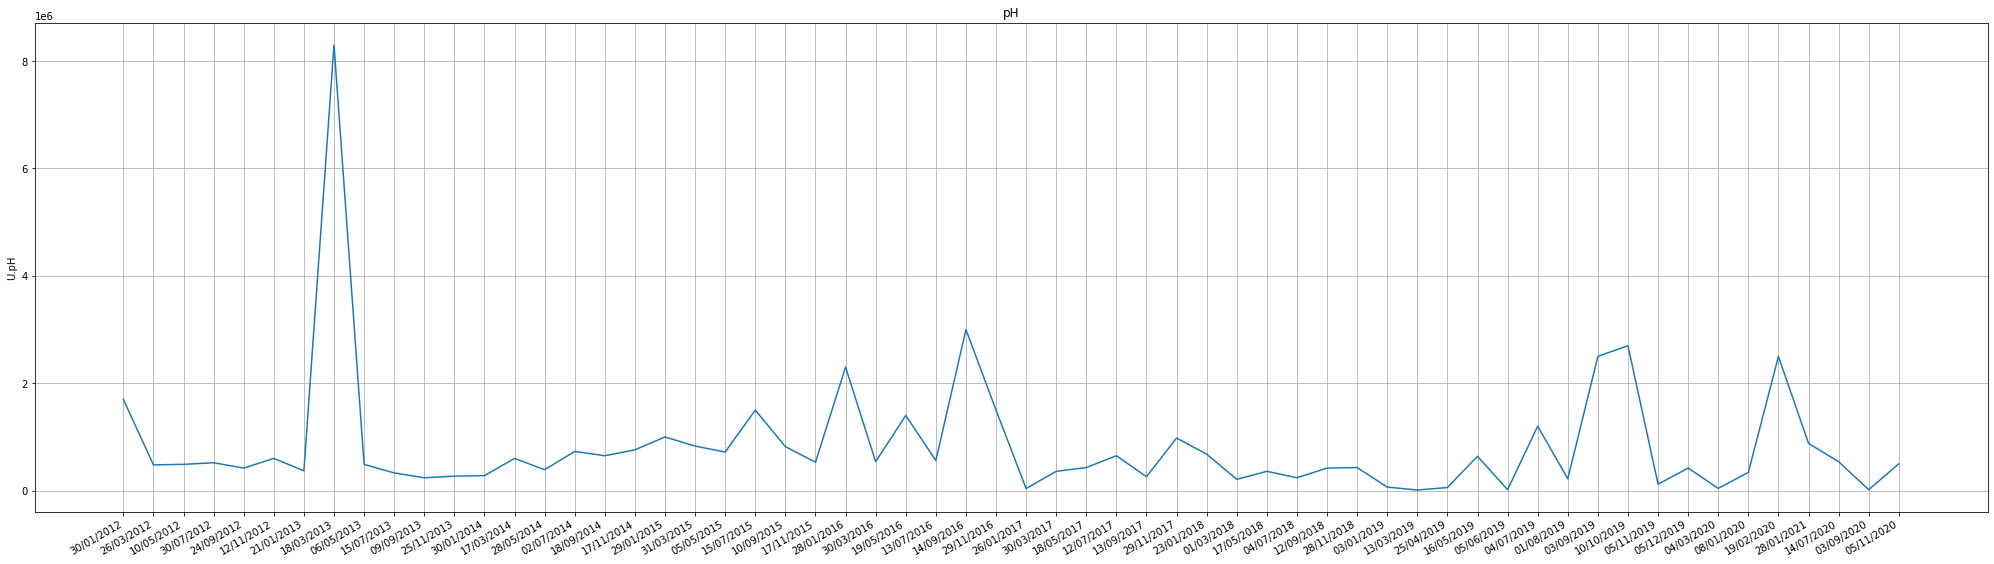

In [66]:
def plot_data(data_x, data_y, title, y_label):
    ##plt.figure(figsize=(35, 10))
    fig, ax = plt.subplots(figsize=(12, 12))
    plt.plot(data_x, data_y)
    plt.gcf().autofmt_xdate()
    plt.title(title)
    plt.ylabel(y_label)
    plt.grid(True)
    date_form = DateFormatter("%m-%d")
    ax.xaxis.set_major_formatter(date_form)
    plt.show()


plot_data(coliformes["Data Coleta"], coliformes["Valor"].astype(float), "pH", "U.pH")

### Dados Coletados 

In [ ]:
pH = 0.12
DBO = 0.10
OD = 0.17
temp = 0.10
nitro = 0.10
turb = 0.08
fos = 0.1
res = 0.08
fosf = 0.1
coli = 0.15
list_data = [DBO, nitro, coli, pH, OD, temp, fosf, turb, res]